In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [60]:
import scipy as sp
import scipy.stats as st

## Graphing

In [61]:
db = pd.read_csv("test_run4.csv")
yVals = np.array(db["reading"])

dt = 0.25
xVals = np.linspace(0, dt*len(yVals), len(yVals))

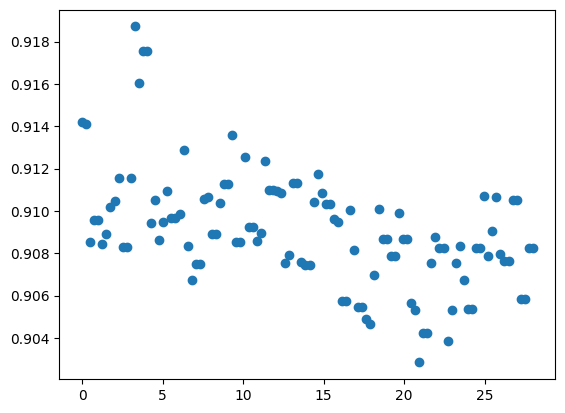

In [62]:

plt.scatter(xVals, yVals)
plt.show()


## Statistics

In [63]:
# Split the array [5-15), [15-25)
iLeft = 5  # left boundary
iSplitLeft = 10  # middle split value left
iSplitRight = 22  # middle split value right
iRight = 27  # right boundary

yLeft = yVals[int(iLeft // dt): int(iSplitLeft // dt)]
xLeft = xVals[int(iLeft // dt): int(iSplitLeft // dt)]

yRight = yVals[int(iSplitRight // dt) + 1: int(iRight // dt) + 1]
xRight = xVals[int(iSplitRight // dt) + 1: int(iRight // dt) + 1]


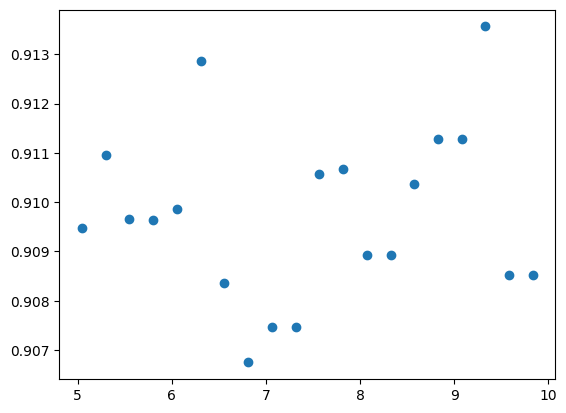

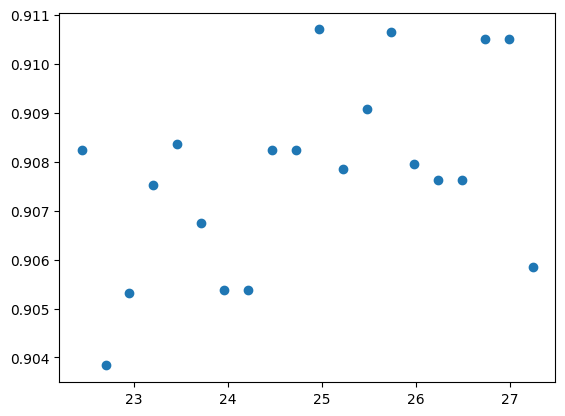

In [64]:
# Checking if the split is correct
plt.scatter(xLeft, yLeft)
plt.show()

plt.scatter(xRight, yRight)
plt.show()

In [65]:
# Welch's t-test
print(st.ttest_ind(yLeft, yRight, equal_var=False))

Ttest_indResult(statistic=3.375257740462778, pvalue=0.001725178332541624)


## Physics

### Value calc.

In [66]:
meanTrue = np.mean((yRight - np.mean(yRight))**2)
rms = np.sqrt(meanTrue)
A = np.sqrt(2)*rms

In [67]:
dy = yLeft - yRight
meanTrueRel = np.mean((dy - np.mean(dy))**2)
rmsNew = np.sqrt(meanTrueRel)
dPhi = 2*np.arcsin(rmsNew/(np.sqrt(2)*A))

In [68]:
wavelength = 532*10**(-9)  # m
c = 299792458  # m/s
R = 0.4  # m
deltaR = 0.0

In [69]:
dOmega = dPhi*wavelength*c/(8*(np.pi*R)**2)

In [70]:
rps = dOmega/2/np.pi*180/360  # rotations per second

### Error calc.
##### (See logbook for formulas derivation)

In [71]:
deltaMeanT = st.sem((yRight - np.mean(yRight))**2)
deltaRms = deltaMeanT / (2*np.sqrt(meanTrue))

deltaA = np.sqrt(2) * deltaRms

In [72]:
deltaMeanTR = st.sem((dy - np.mean(dy))**2)
deltaRmsNew = deltaMeanTR / (2*np.sqrt(meanTrueRel))

deltaRmsNewDivASq2 = rmsNew / A * np.sqrt((deltaRmsNew / rmsNew)**2 + (deltaA / A)**2)
deltaAsin = deltaRmsNewDivASq2 / np.sqrt(1 - (rmsNew/A)**2)

deltaDphi = 2*deltaAsin

In [73]:
deltaDomega = dOmega * np.sqrt((deltaDphi / dPhi)**2 + (deltaR / R)**2)
deltaRps = deltaDomega / (4*np.pi)